In [138]:
import string
import spacy
import en_core_web_sm
from nltk.corpus import stopwords
import re
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

### Comparación del análisis de sentimiento de Nietzsche vs Gandhi mediante una visualización:

In [120]:
Autores=["Friedrich Nietzsche", "Mahatma Gandhi"]

In [121]:
pd.DataFrame(Autores)

,0
0,Friedrich Nietzsche
1,Mahatma Gandhi


In [122]:
response_dict = {}
for autor in Autores:
    NLP=requests.get(f"http://127.0.0.1:5000/NLP/{autor}")
    response=NLP.json()
    response_dict[autor] = response
    print(response)    

0.26650591715976335
0.1824760479041916


In [123]:
response_dict

{'Friedrich Nietzsche': 0.26650591715976335,
 'Mahatma Gandhi': 0.1824760479041916}

In [131]:
df=pd.DataFrame(response_dict,  index=[0])

In [132]:
tras=df.transpose()

In [133]:
df2=tras.reset_index()

In [135]:
df2.rename(columns={"index": "Autores", 0: "Compound"}, inplace=True)

In [136]:
df2

,Autores,Compound
0,Friedrich Nietzsche,0.266506
1,Mahatma Gandhi,0.182476


In [ ]:
x="year", y="passengers", data=vuelos,ci="sd"

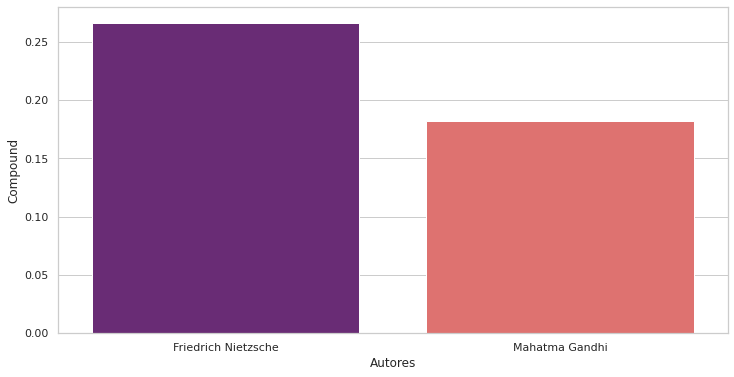

In [146]:
sns.barplot(x="Autores", y="Compound", data=df2, palette="magma");

Como el compound score >= 0.05, sería un sentimiento positivo en el caso de las frases de ambos autores. Sin embargo, conociendo las temáticas tan opuestas sobre las que escríbían el uno y el otro, parece que este tipo de análisis no es del todo exacto y fiable.